In [5]:
from IPython.display import Image

## Pipeline
- pipeline 사용법
1. class sklearn.pipeline.Pipeline(steps, *, memory=None, verbose=False)
    - sklearn.pipeline.Pipeline은 데이터 전처리 및 머신러닝 모델 학습을 하나의 파이프라인으로 묶어주는 scikit-learn 라이브러리의 클래스입니다
    - 파라미터의 steps가 튜플의 리스트이다
2. sklearn.pipeline.make_pipeline(*steps, memory=None, verbose=False)
    - 이 함수는 파이프라인의 단계에 자동으로 이름을 할당하므로 사용자가 각 단계의 이름을 지정할 필요가 없습니다.
    - 파라미터의 steps가 객체들의 나열이다
    - make_pipeline은 pipeline을 쉽게 사용하기 위한 것이다.

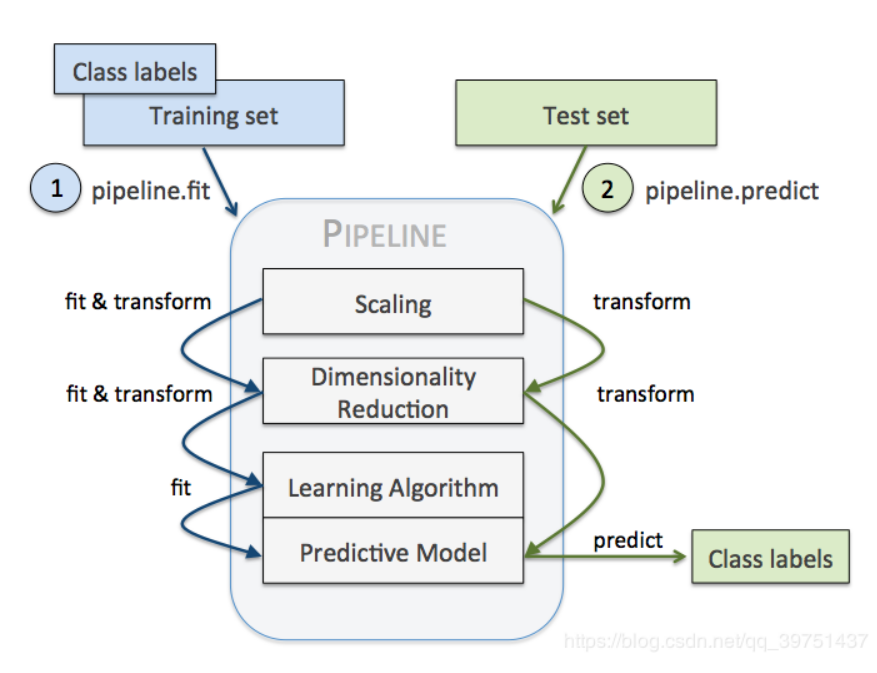

In [7]:
# 이미지 파일 경로
image_path = "./images/6_1.png"

# 이미지 표시
Image(filename=image_path)

---

### 1.pipeline 사용법
1. 작업명,작업클래스 두 개로 이루어진 튜플을 리스트로 담아서 Pipeline에 담기
    - Pipeline([('작업1' , 작업 클래스) , ('작업2' , 작업 클래스)])
2. Pipelien 을 fit하기
3. Pipeline을 predcit

### 2.pipeline parameters&attribute&methods
- Parameters (파라미터):
    - steps: 리스트 (List), shape=(n_steps, 2)
    - 파이프라인의 각 단계를 정의하는 튜플의 리스트입니다. 각 튜플은 단계의 이름 (문자열)과 단계의 변환기 또는 추정기 (모델)를 지정합니다.

- Attributes (어트리뷰트):
    - named_steps: dict,파이프라인 단계의 이름과 해당 변환기 또는 모델을 매핑한 사전(Dictionary)입니다.
- Methods (메소드):
    - fit(X, y=None, **fit_params): 파이프라인을 학습합니다.
        - X: 배열 또는 희소 행렬,입력 데이터입니다.
        - y: 배열, 기본값=None, 타겟 변수입니다.
    - **fit_params: 딕셔너리, 학습 과정에 대한 추가 매개변수입니다.
    - fit_transform(X, y=None, **fit_params): 파이프라인을 학습하고 입력 데이터를 변환합니다.
    - transform(X): 입력 데이터를 변환합니다.
    - predict(X): 입력 데이터에 대한 예측을 수행합니다.
    - predict_proba(X): 입력 데이터에 대한 클래스 확률 예측을 수행합니다.
    - score(X, y[, sample_weight]): 모델의 성능을 평가합니다.
    - get_params([deep]): 파이프라인의 매개변수를 반환합니다.
    - set_params(**params): 파이프라인의 매개변수를 설정합니다.

In [2]:
from sklearn.datasets import make_regression,make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# 분류할 데이터 생성
X, y = make_classification(n_samples=100,n_features=10,n_informative=2 , random_state=42)
# 0.33 비율로 트레인 테스트 스플릿
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

# pipeline생성 (스케일링과 ,분석방법)
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', DecisionTreeClassifier(random_state=112))
	])
# 위의 pipeline을 make_pipeline을 이용해서 똑같이 정의하는 방법
pilpeline_ = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=112))

pipeline.fit(X_train,y_train)
y_preds=pipeline.predict(X_test)
accuracy_score(y_test,y_preds)

0.8787878787878788

In [3]:
from sklearn.linear_model import LogisticRegression

pipeline2 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', LogisticRegression())
	])

pipeline2.fit(X_train,y_train)
y_preds2=pipeline2.predict(X_test)
accuracy_score(y_test,y_preds2)


0.9393939393939394

- use iris data 

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', DecisionTreeClassifier(random_state=112))
	])

pipeline.fit(X_train,y_train)
y_preds = pipeline.predict(X_test)
accuracy_score(y_test,y_preds)

0.98

In [5]:
pipeline2 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', LogisticRegression())
	])

pipeline2.fit(X_train,y_train)
y_preds2 = pipeline2.predict(X_test)
accuracy_score(y_test,y_preds2)

0.98

### 2. pipeline과 교차검증(k-fold, stratified k-fold)
- use sklearn.model_selection.cross_val_score

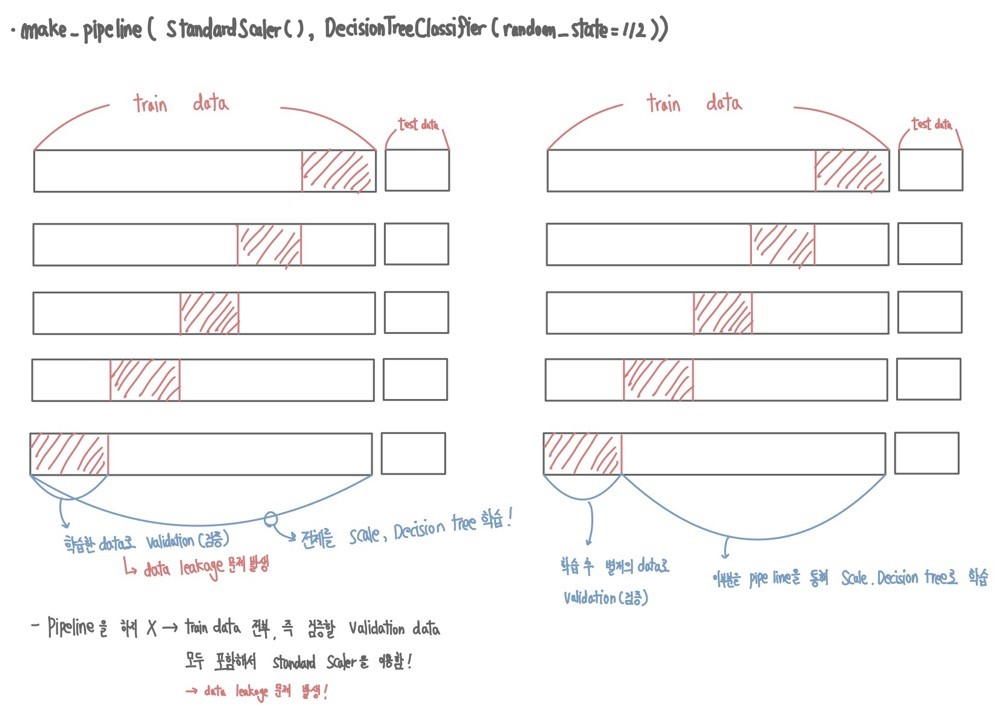

In [10]:
# 이미지 파일 경로
image_path = "./images/6_2.jpg"

# 이미지 표시
Image(filename=image_path)

- 이렇게 하지 않으면, 교차 검증과정에서의 트레인 데이터와 검증 데이터가 모두 학습되고 검증 데이터를 이용해 성능 평가를 하게된다
- 그렇게 되면 데이터 누출(data- leakage)문제가 발생하게 된다
- 이를 pipeline을 통해 해결할 수 있다

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', DecisionTreeClassifier())
	])
scores = cross_val_score(pipeline,X , y ,scoring='accuracy' ,  cv=5 )
scores


array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

In [7]:
import numpy as np

np.mean(scores)

0.9600000000000002

### 3. pipeline과 교차검증과 gridsearchCV

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split,KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

rfc = RandomForestClassifier(random_state=112)
sts = StandardScaler()

pipeline=Pipeline([
    ('scaler',sts),
    ('clf',rfc)
])

kflod =KFold(n_splits=5, shuffle=True, random_state=0)

params = {
    "clf__max_depth" : [3,5,7,9],
    "clf__min_samples_split" : [4,6,8]
}

grid_model = GridSearchCV(estimator=pipeline,
                          param_grid=params,
                          cv=kflod,
                          scoring='accuracy',
                          refit=True)

grid_model.fit(X_train,y_train)

print('교차검증 점수 : ', grid_model.best_score_)
print('최적의 하이퍼 파라메터 조합 :', grid_model.best_params_)
print('학습 평가 : ', grid_model.score(X_train, y_train))
print('테스트 평가 : ', grid_model.score(X_test, y_test))

교차검증 점수 :  0.9400000000000001
최적의 하이퍼 파라메터 조합 : {'clf__max_depth': 3, 'clf__min_samples_split': 4}
학습 평가 :  0.96
테스트 평가 :  0.98


---

- 살짝 심화 !!!

if, 만약에 데이터 중에 일부는 범주형 data, 일부는 연속형 data라면?
- 서로 같은 전처리 방식을 사용할 수 없음... --> 즉 같은 pipeline을 사용할 수 없음
- 각각 data에 맞는 전처리나, 분석 방법을 이용해야 한다

### sklearn.compose.ColumnTransformer
- class sklearn.compose.ColumnTransformer(transformers, *, remainder='drop', sparse_threshold=0.3, n_jobs=None, transformer_weights=None, verbose=False, verbose_feature_names_out=True)
- scikit-learn에서 여러 열 변환기를 조합하여 다양한 특성 열을 처리하기 위한 유용한 도구 중 하나입니다.

#### Attributes (어트리뷰트):
- transformers_: 리스트 (List)실제로 사용된 열 변환기의 리스트입니다. 파라미터로 지정한 열 변환기 중에서 실제로 적용된 것들만 포함합니다.
- named_transformers_: dict열 변환기의 이름과 해당 변환기 객체를 매핑한 사전(Dictionary)입니다.
#### Methods (메소드):
- fit(X[, y]): 열 변환기를 학습합니다.
- transform(X): 입력 데이터를 변환합니다.
- fit_transform(X[, y]): 열 변환기를 학습하고 입력 데이터를 변환합니다.
- get_params([deep]): 파라미터를 반환합니다.
- set_params(**params): 파라미터를 설정합니다.
- get_feature_names_out(input_features=None): 출력 열의 이름을 반환합니다. 이 메소드는 열 변환기(Column Transformer)의 출력 열에 대한 이름을 가져옵니다.
- input_features: 배열, 기본값=None, 입력 특성(열)의 이름입니다. 만약 지정되지 않으면 변환된 열에 대한 기본 이름이 사용됩니다.
- get_metadata_routing(): 메타데이터 라우팅 정보를 반환합니다. 이 메소드는 열 변환기의 메타데이터 라우팅 정보를 가져옵니다.

In [9]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [10]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [11]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

housing_labels = housing["median_house_value"].copy()
housing = housing.drop("median_house_value", axis=1)

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"), 
    StandardScaler())

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

### sklearn.compose.make_column_selector

- sklearn.compose.make_column_selector(pattern=None, *, dtype_include=None, dtype_exclude=None)
- make_column_selector는 데이터 유형 또는 열 이름에 따라 열을 선택할 수 있습니다. 여러 선택 기준을 사용할 때는 모든 기준이 열에 일치해야 열이 선택됩니다.
#### Parameters (파라미터):
- pattern: str 또는 callable, 기본값='all',선택할 열의 패턴을 지정하는 문자열 또는 함수입니다. 문자열이면 'all'은 모든 열을 선택하고, 'numeric'은 숫자형 열을 선택합니다.
- 함수인 경우에는 함수의 반환값이 True인 열을 선택합니다.

- dtype_include: any, 기본값=None, 선택할 열의 데이터 타입을 지정합니다. 예를 들어, int 또는 float 등이 가능합니다.
d- type_exclude: any, 기본값=None, 제외할 열의 데이터 타입을 지정합니다.

### sklearn.compose.make_column_transformer

- sklearn.compose.make_column_transformer(*transformers, remainder='drop', sparse_threshold=0.3, n_jobs=None, verbose=False, verbose_feature_names_out=True)
- 이것은 ColumnTransformer 생성자의 단축(shorthand) 버전입니다. 이름을 지정하는 것을 요구하지 않으며 허용하지 않습니다. 대신, 변환기의 유형에 기반하여 자동으로 이름이 지정됩니다. 또한 transformer_weights를 사용하여 가중치를 지정하는 것을 허용하지 않습니다.
#### Parameters (파라미터):
- *transformers: 가변 인자 (Variadic Arguments), 열 변환기(Column Transformer)를 정의하는 튜플의 리스트입니다. 각 튜플은 변환기의 이름, 변환기 객체, 적용할 열 또는 열 범위(인덱스)로 구성됩니다. 'passthrough'를 사용하면 열 변환 없이 그대로 전달할 수 있습니다.
- remainder: {'drop', 'passthrough'}, 기본값='drop'열 변환 이후에 남은 열을 처리하는 방법을 지정합니다. 'drop'인 경우 변환 후에 남은 열을 삭제하고, 'passthrough'인 경우 변환 후에 그대로 유지합니다.

In [12]:
from sklearn.compose import make_column_selector, make_column_transformer

num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"), 
    StandardScaler())

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)


In [13]:
## 모델 객체 보는 방법
from sklearn import set_config

set_config(display='diagram')
preprocessing

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000168E0077160>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000168E0076AA0>)])

In [14]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000168E0077160>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000168E0076AA0>)])),
                ('linearregression', LinearRegression())])

In [15]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing)

lin_rmse = mean_squared_error(housing_labels, housing_predictions,
                              squared=False)
lin_rmse

68709.3255776217